In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Loading Dataset

df = pd.read_csv("add.csv", low_memory = False, header = 0)
# Dataset

print(df)

      Unnamed: 0     0     1       2  3  4  5  6  7  8  ...  1549  1550  1551  \
0              0   125   125       1  1  0  0  0  0  0  ...     0     0     0   
1              1    57   468  8.2105  1  0  0  0  0  0  ...     0     0     0   
2              2    33   230  6.9696  1  0  0  0  0  0  ...     0     0     0   
3              3    60   468     7.8  1  0  0  0  0  0  ...     0     0     0   
4              4    60   468     7.8  1  0  0  0  0  0  ...     0     0     0   
...          ...   ...   ...     ... .. .. .. .. .. ..  ...   ...   ...   ...   
3274        3274   170    94  0.5529  0  0  0  0  0  0  ...     0     0     0   
3275        3275   101   140  1.3861  1  0  0  0  0  0  ...     0     0     0   
3276        3276    23   120  5.2173  1  0  0  0  0  0  ...     0     0     0   
3277        3277     ?     ?       ?  1  0  0  0  0  0  ...     0     0     0   
3278        3278    40    40       1  1  0  0  0  0  0  ...     0     0     0   

      1552  1553  1554  155

In [ ]:
# Shape

print(df.shape)

(3279, 1560)


In [ ]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [ ]:
df.columns = df.columns.astype("int")

In [ ]:
df.dtypes.head(3)

0    object
1    object
2    object
dtype: object

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


In [ ]:
df.iloc[:, 0:3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3279 non-null   object
 1   1       3279 non-null   object
 2   2       3279 non-null   object
dtypes: object(3)
memory usage: 77.0+ KB


Axes(0.125,0.11;0.775x0.77)


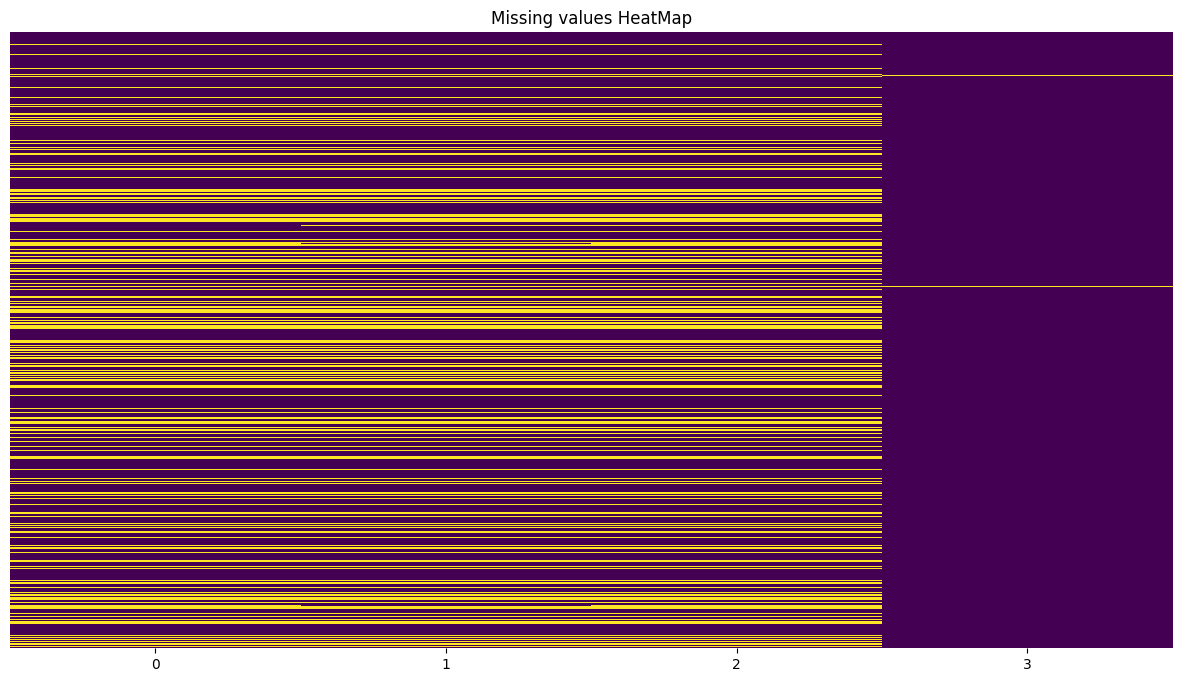

In [ ]:
df1 = df.loc[:, [0,1, 2, 3]]
df1 = df1.applymap(lambda x:"?" in x)
plt.figure(figsize=(15,8))
plt.title("Missing values HeatMap")
print((sns.heatmap(df1, cbar=False, yticklabels = False, cmap = "viridis")))

In [ ]:
for i in df1:
    print('column[' + str(i) +'] has missing values -' + str(sum(df1[i])))

column[0] has missing values -903
column[1] has missing values -901
column[2] has missing values -910
column[3] has missing values -15


In [ ]:
def replacing_missing(df):
    for i in df:
        df[i] = df[i].replace("[?]", np.NAN, regex = True).astype("float")
        df[i] = df[i].fillna(df[i].mean())
    return df

In [ ]:
df[[0, 1, 2, 3]] = replacing_missing(df.iloc[:, [0, 1, 2, 3]].copy()).values

In [ ]:
df[3] = df[3].apply(lambda x : round(x))

In [ ]:
df[[1, 2, 3, 4]].describe()

,1,2,3,4
count,3279.000000,3279.000000,3279.000000,3279.000000
mean,155.344828,3.911953,0.768222,0.004270
std,110.729038,5.136153,0.422032,0.065212
min,1.000000,0.001500,0.000000,0.000000
25%,90.000000,1.279400,1.000000,0.000000
50%,150.000000,3.911953,1.000000,0.000000
75%,155.344828,3.911953,1.000000,0.000000
max,640.000000,60.000000,1.000000,1.000000


<ipython-input-40-16ab9ae6c912>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[0], ax = ax[0])
<ipython-input-40-16ab9ae6c912>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[1], ax = ax[1])
<ipython-input-40-16ab9ae6c912>:6: UserWarning: 

`distplot` is a deprecated function and will b

<Axes: xlabel='3', ylabel='Density'>

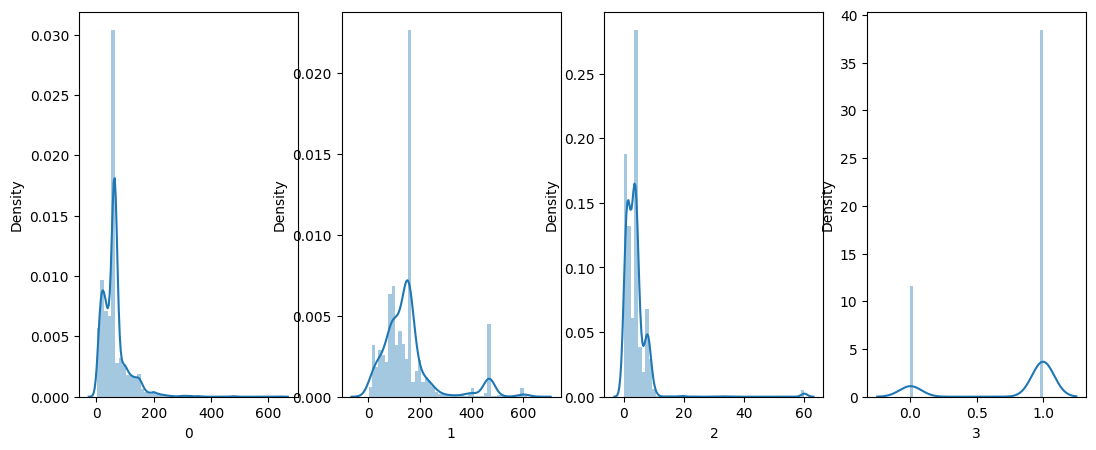

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4)
fig.set_figheight(5)
fig.set_figwidth(13)
sns.distplot(df[0], ax = ax[0])
sns.distplot(df[1], ax = ax[1])
sns.distplot(df[2], ax = ax[2])
sns.distplot(df[3], ax = ax[3])

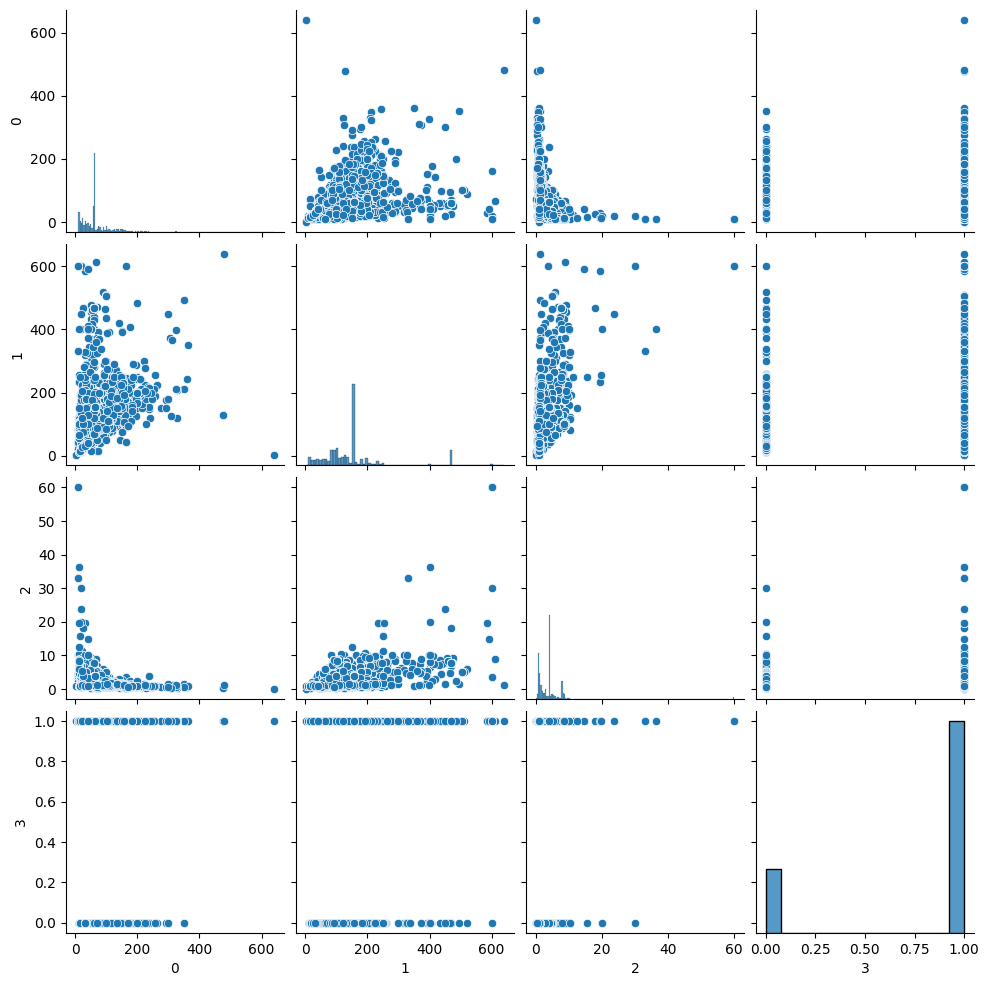

In [ ]:
sns.pairplot(data = df.iloc[:, [0, 1, 2, 3, 1558]])

add/non-ad vs Features


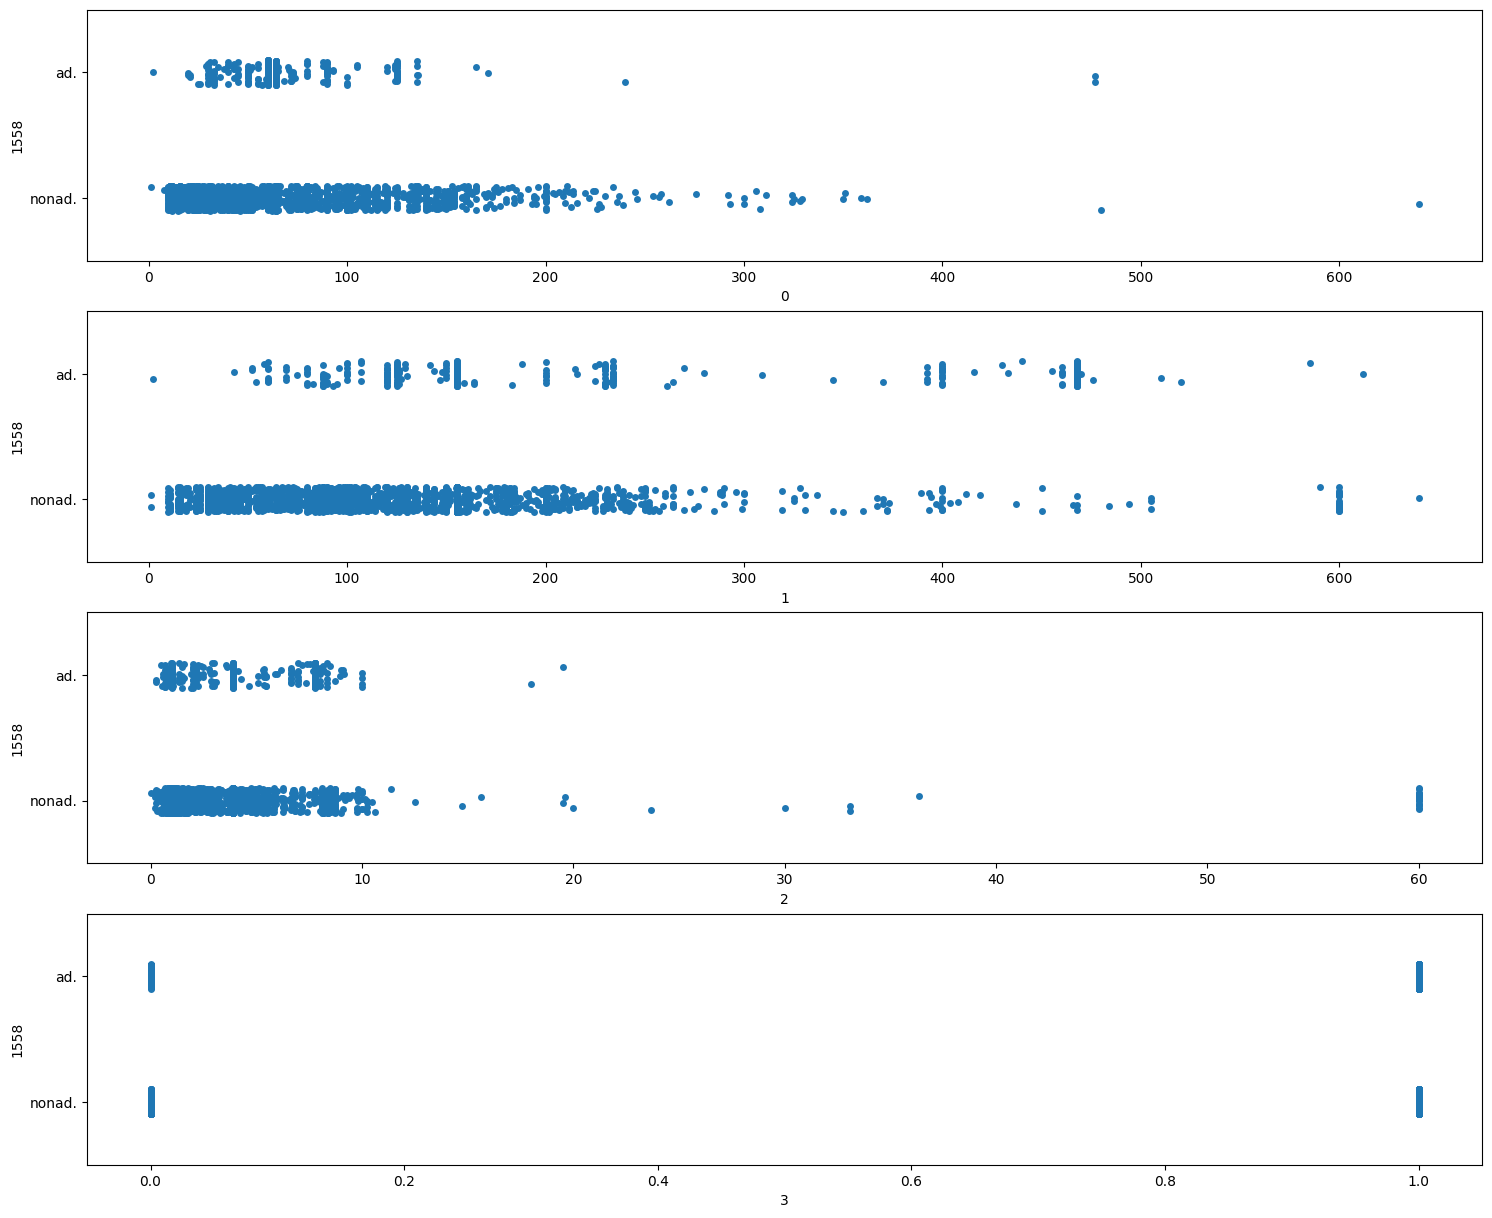

In [ ]:
print("add/non-ad vs Features")
fig, ax = plt.subplots(nrows = 4, ncols = 1)
fig.set_figheight(15)
fig.set_figwidth(18)
sns.stripplot(y=1558,x=0,data=df,ax=ax[0])
sns.stripplot(y=1558,x=1,data=df,ax=ax[1])
sns.stripplot(y=1558,x=2,data=df,ax=ax[2])
sns.stripplot(y=1558,x=3,data=df,ax=ax[3])
plt.show()

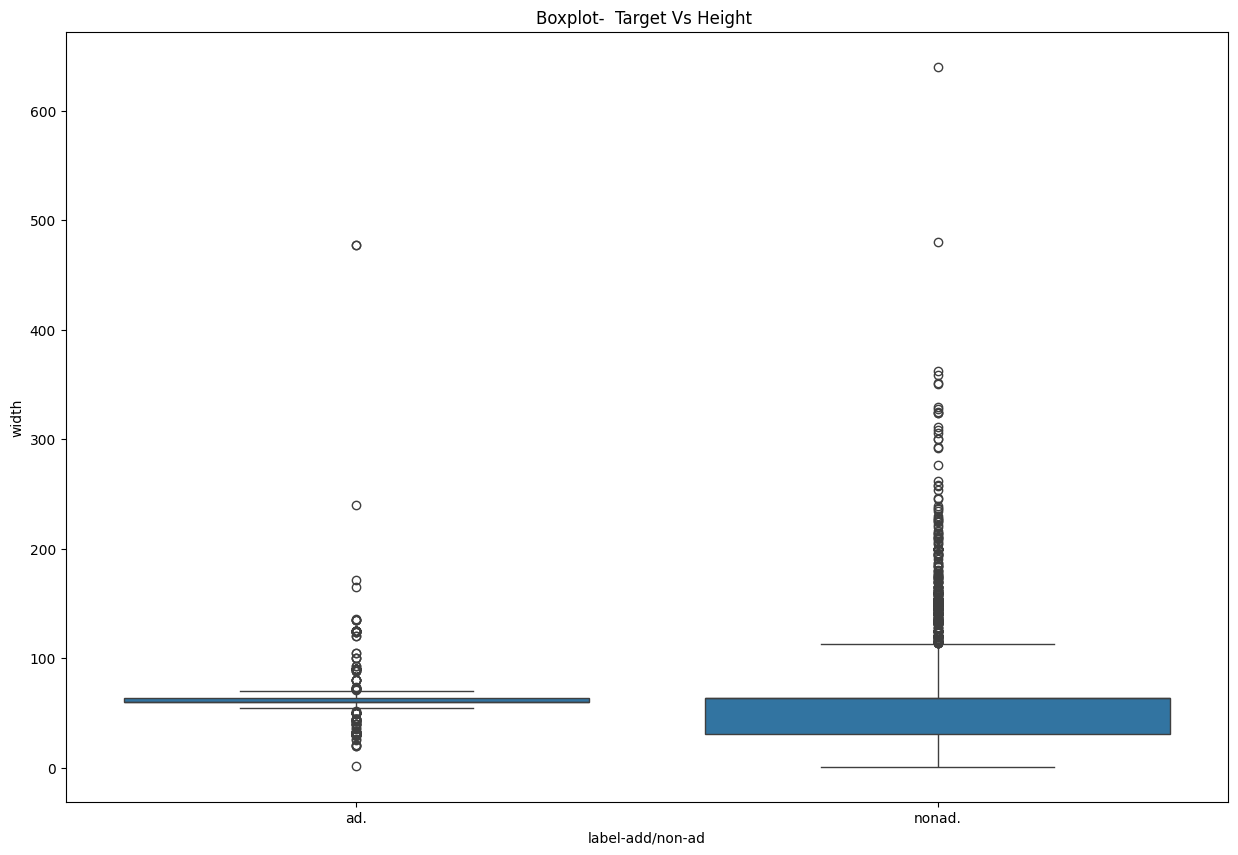

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=0,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Height ")
plt.show()

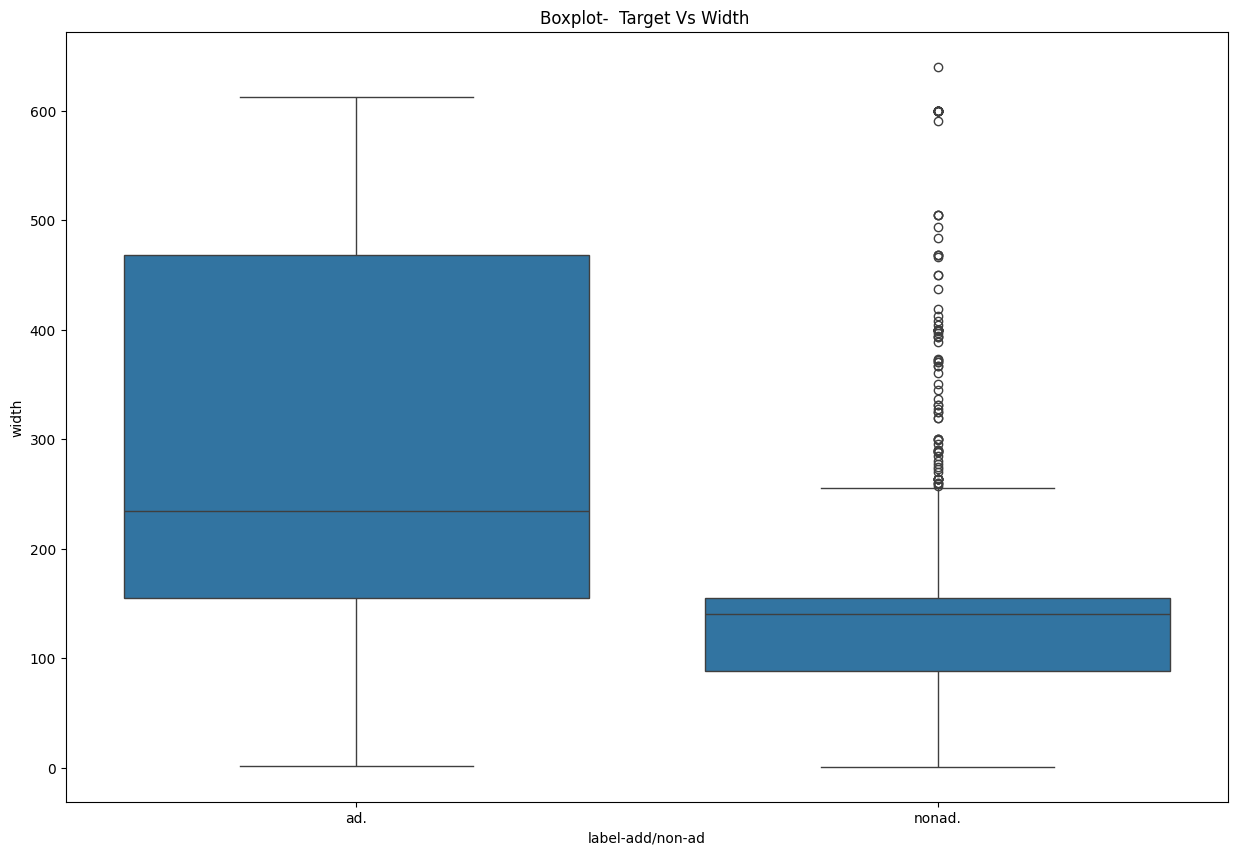

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=1,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Width ")
plt.show()

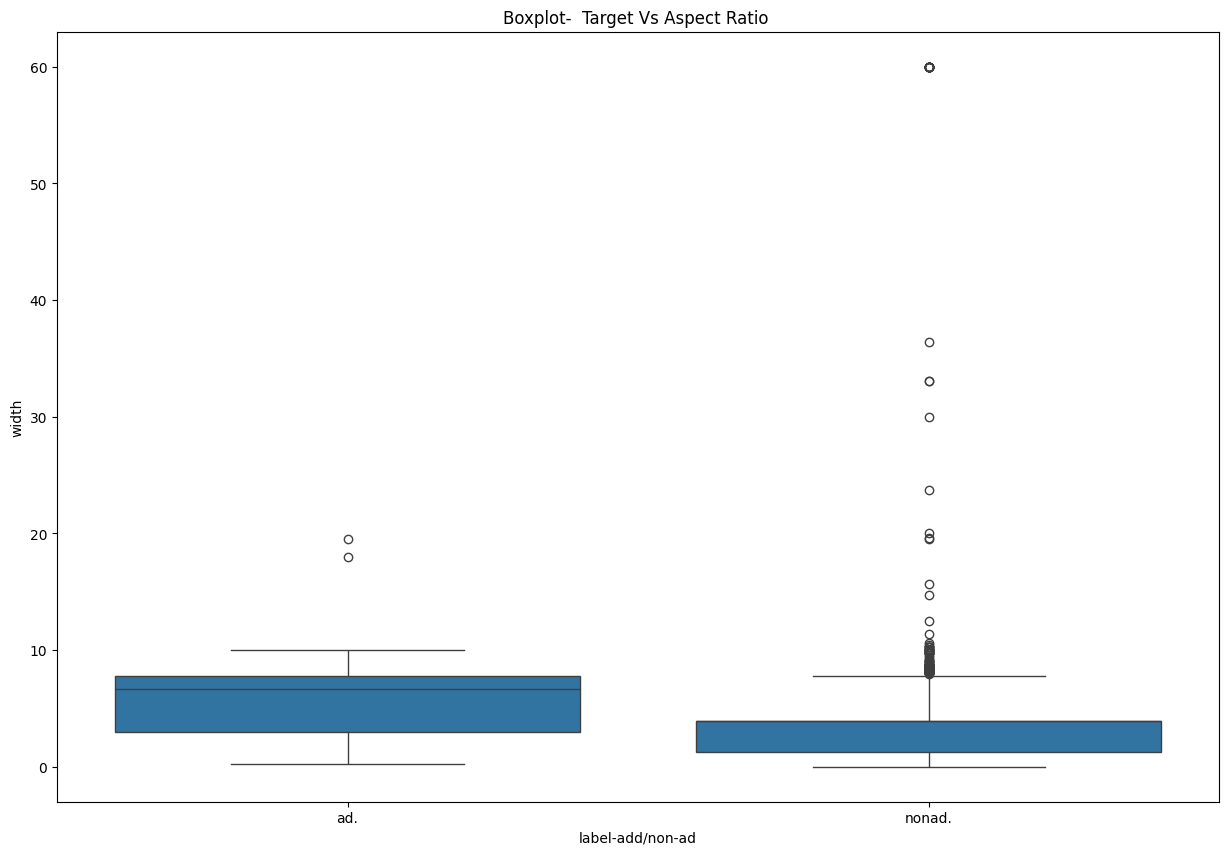

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=2,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Aspect Ratio ")
plt.show()

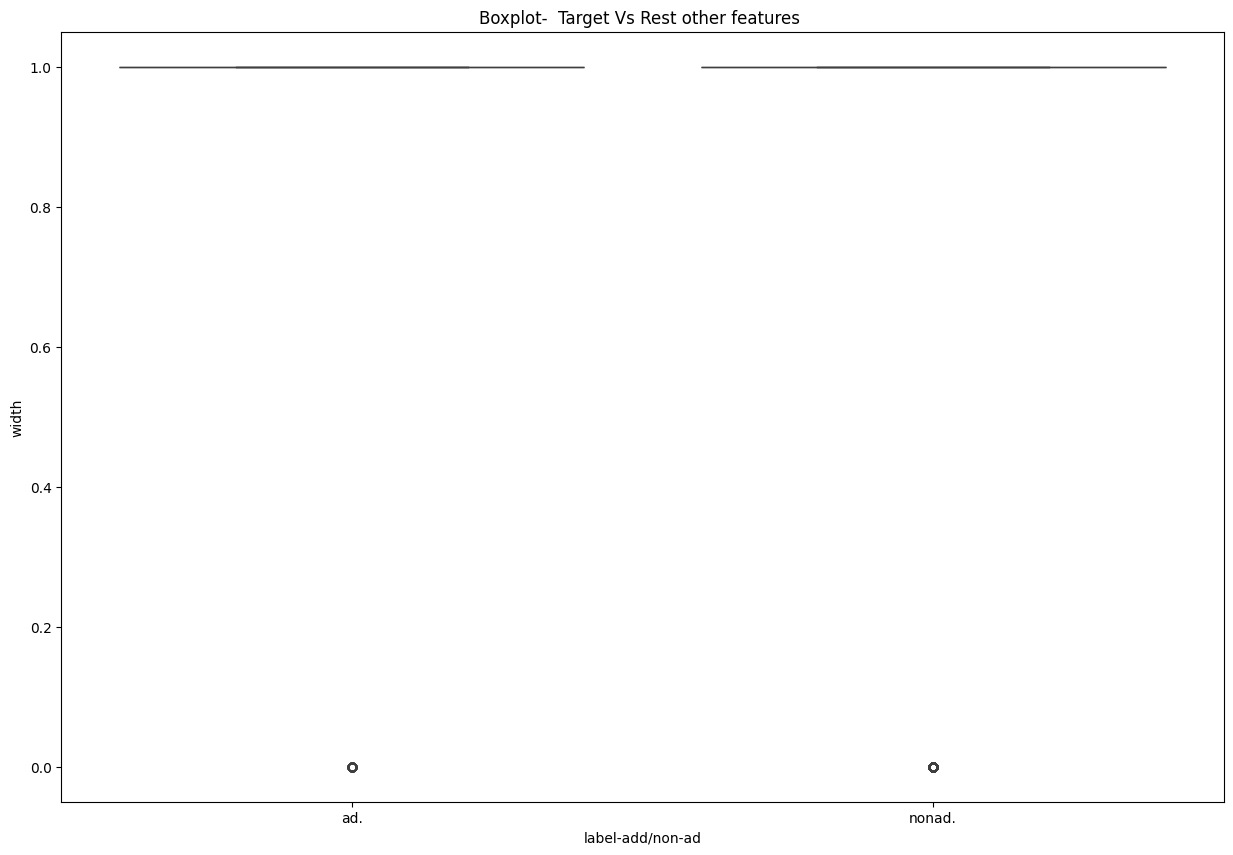

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=3,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Rest other features ")
plt.show()

In [ ]:
df.iloc[:, -1] = df.iloc[:, -1].replace(["ad.", "nonad."], [1, 0])

<ipython-input-47-35a589fed934>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = df.iloc[:, -1].replace(["ad.", "nonad."], [1, 0])


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
scaled = StandardScaler()
X = scaled.fit_transform(x)

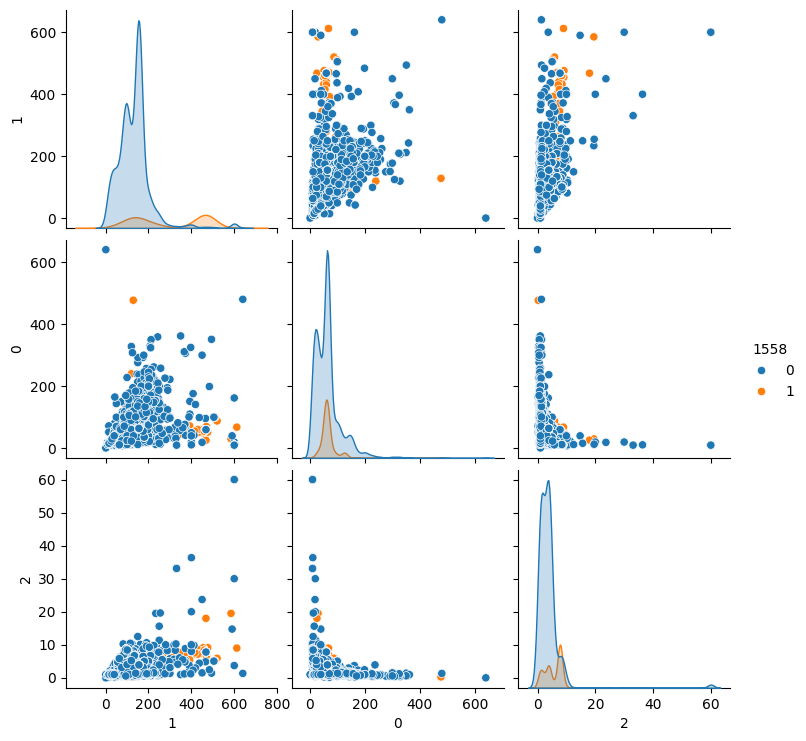

In [ ]:
sns.pairplot(data=df.iloc[:,[1, 0,2, -1]],hue=1558)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)

In [ ]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    print("{}: {:.6f}({:.6f})".format(name, cv_results.mean(), cv_results.std()))

LR: 0.958930(0.011695)
LDA: 0.963810(0.010967)
KNN: 0.952832(0.009634)
CART: 0.955263(0.013372)
NB: 0.774302(0.016535)
SVM: 0.963811(0.007357)


Text(0.5, 1.0, 'Algorithm Comparison')

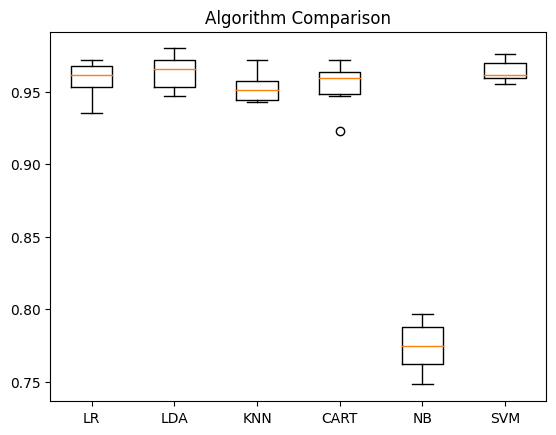

In [ ]:
plt.boxplot(results, labels = names)
plt.title("Algorithm Comparison")

In [ ]:
model = SVC(gamma = "auto")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9707317073170731


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[703   2]
 [ 22  93]]


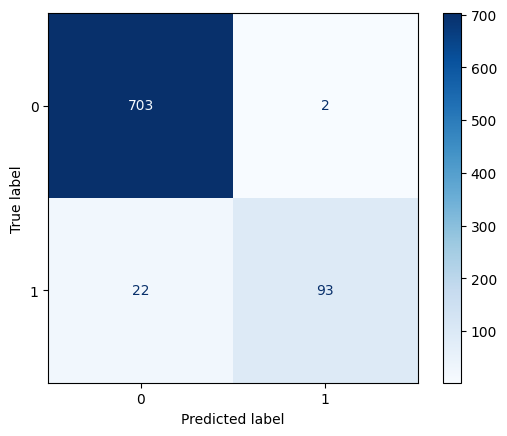

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")

# Show the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       705
           1       0.98      0.81      0.89       115

    accuracy                           0.97       820
   macro avg       0.97      0.90      0.93       820
weighted avg       0.97      0.97      0.97       820

